<a href="https://colab.research.google.com/github/BlinkovYevhenGit/CE888_Repository/blob/main/bootstrap_lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook you'll create your own bootstrap function following the bootstrap algorithm (check the lecture notes!)

In [232]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np



In [233]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
x = df.values.T[1]

In [234]:
df

,Day,Millons of pounds in sales
0,1,2.0
1,2,8.0
2,3,20.0
3,4,13.0
4,5,5.0
5,6,9.0
6,7,10.0
7,8,8.0
8,9,22.0
9,10,10.0


In [33]:
len(x)

14

In [34]:
n_bootstraps=100
sample_size=10
def make_bootstraps(x, n_bootstraps, sample_size):
  bootstaps=[np.random.choice(x,sample_size) for i in range(0, n_bootstraps)]
  return bootstaps



# Checking the notes from the lecture, create here your own bootstrap function:
# 1. Sample from the input array x to create an array of samples of shape (n_bootstraps, sample_size)
# Hint: Check the function random.choice() on Numpy
# 2. Calculate and save the mean of the array (this is "data_mean" that is returned by the function)
# 3. Calculate the mean from each bootstrap (i.e., row) and store it.
# (This should be an array of n_bootstraps values)
# 4. Calculate the lower and upper bounds for a 95% CI (hint: check the percentile function on Numpy)
# 5. Return data_mean, and the lower and upper bounds of your interval

def bootstrap_mean(x, sample_size, n_bootstraps):
  confidence_level=0.95
  bootstraps = make_bootstraps(x, n_bootstraps, sample_size)
  means=[np.mean(b) for b in bootstraps]
  data_mean = np.mean(means)

  # print(means)
  lower_bound_value=(1-confidence_level)/2
  upper_bound_value=1-lower_bound_value
  # print(lower_bound_value)
  # print(upper_bound_value)
  lower=np.percentile(means, lower_bound_value*100)
  upper=np.percentile(means, upper_bound_value*100)

  return data_mean, lower, upper

data_mean, lower, upper=bootstrap_mean(x, sample_size, n_bootstraps)
print("Data mean", data_mean)
print("Lower bound", lower)
print("Upper bound", upper)

Data mean 9.028
Lower bound 5.595000000000001
Upper bound 12.3525


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 51000.0)

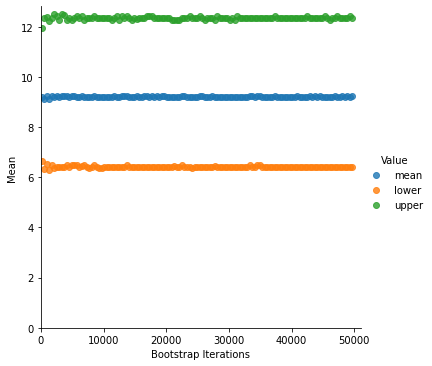

In [193]:
# Call your bootstrap function and plot the results

boots = []
for i in range(100, 50000, 400):
    boot = bootstrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Bootstrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 51000)



Now, modify the bootstrap function you created above so that you can pass your desired confidence interval as a parameter.



In [191]:
def bootstrap_mean_ci(sample, sample_size, n_bootstraps, ci):
  bootstraps = make_bootstraps(sample, n_bootstraps, sample_size)
  means=[np.mean(b) for b in bootstraps]
  data_mean = np.mean(means)

  # print(means)
  lower_bound_value=(100-ci)/2
  upper_bound_value=100-lower_bound_value
  # print(lower_bound_value)
  # print(upper_bound_value)
  lower=np.percentile(means, lower_bound_value)
  upper=np.percentile(means, upper_bound_value)

  return data_mean, lower, upper

In [229]:
x

array([ 2.,  8., 20., 13.,  5.,  9., 10.,  8., 22., 10.,  2.,  4.,  7.,
        9.])

In [242]:

data_mean, lower, upper=bootstrap_mean_ci(x, len(x), 10000  , 95)
print("Data mean", data_mean)
print("Lower bound", lower)
print("Upper bound", upper)

Data mean 9.245
Lower bound 6.5
Upper bound 12.428571428571429


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 100000.0)

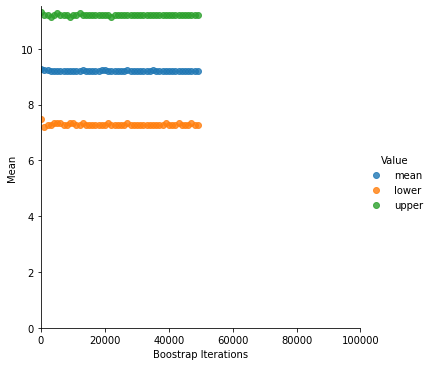

In [192]:
boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean_ci(data, data.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

#sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')


# Vehicles dataset

Now let's work on a different dataset, which is stored in the vehicles.csv file.


In [92]:
# Load and visualise the vehicles dataset
# To load the dataset: https://neptune.ai/blog/google-colab-dealing-with-files (check section "Load individual files directly from GitHub")

df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv')

# Note that the current and new fleets are in different columns and have different lengths, so bear this in mind when you're plotting.
# You can create separate scatterplots for the two fleets, as you would with the histograms, 
# or plot them both in one plot (but not one against the other).
# <---INSERT YOUR CODE HERE--->
# Note: you can add more cells as needed to organise your code and your plots


In [93]:
df["Index"]=np.arange(0,len(df))

In [94]:
df

,Current fleet,New Fleet,Index
0,18,24.0,0
1,15,27.0,1
2,18,27.0,2
3,16,25.0,3
4,17,31.0,4
...,...,...,...
244,27,NaN,244
245,27,NaN,245
246,32,NaN,246
247,28,NaN,247


Text(0.5, 0, 'Fleet score')

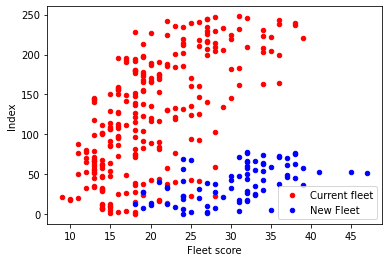

In [97]:
ax1 = df.plot.scatter(y="Index", x="Current fleet", color='r', label="Current fleet")
ax2 = df.plot.scatter(y="Index", x="New Fleet", ax=ax1, color='b', label="New Fleet")
ax2.set_xlabel("Fleet score")

## Compare the two fleets

The business analysts come up a comparison algorithm that requires the upper and lower bounds for the mean in order to say which fleet is better.
1. Calculate the mean of both samples.
2. Using the bootstrap function that you created:
    - Construct the 95% CI of the mean of the current fleet.
    - Construct the 95% CI of the mean of the new fleet.
    - Are they comparable? (i.e., is one better than the other?) -- you can do this with a permutation test (check the lecture notes!)

In [194]:
current_fleet=df["Current fleet"].values
print(np.mean(current_fleet))
new_fleet_trunc=[item for item in df["New Fleet"].values if not np.isnan(item)]
print(np.nanmean(new_fleet_trunc))

20.14457831325301
30.481012658227847


In [195]:
new_fleet_trunc

[24.0,
 27.0,
 27.0,
 25.0,
 31.0,
 35.0,
 24.0,
 19.0,
 28.0,
 23.0,
 27.0,
 20.0,
 22.0,
 18.0,
 20.0,
 31.0,
 32.0,
 31.0,
 32.0,
 24.0,
 26.0,
 29.0,
 24.0,
 24.0,
 33.0,
 33.0,
 32.0,
 28.0,
 19.0,
 32.0,
 34.0,
 26.0,
 30.0,
 22.0,
 22.0,
 33.0,
 39.0,
 36.0,
 28.0,
 27.0,
 21.0,
 24.0,
 30.0,
 34.0,
 32.0,
 38.0,
 37.0,
 30.0,
 31.0,
 37.0,
 32.0,
 47.0,
 41.0,
 45.0,
 34.0,
 33.0,
 24.0,
 32.0,
 39.0,
 35.0,
 32.0,
 37.0,
 38.0,
 34.0,
 34.0,
 32.0,
 33.0,
 32.0,
 25.0,
 24.0,
 37.0,
 31.0,
 36.0,
 36.0,
 34.0,
 38.0,
 32.0,
 38.0,
 32.0]

In [241]:
boot = bootstrap_mean_ci(current_fleet, len(current_fleet), 10000  , 92)
print("Data mean", boot[0])
print("Lower bound", boot[1])
print("Upper bound", boot[2])
print()
boot = bootstrap_mean_ci(new_fleet_trunc, len(new_fleet_trunc), 10000, 95)
print("Data mean", boot[0])
print("Lower bound", boot[1])
print("Upper bound", boot[2])

Data mean 20.146818473895582
Lower bound 19.429718875502008
Upper bound 20.867469879518072

Data mean 30.48045316455696
Lower bound 29.11392405063291
Upper bound 31.835443037974684


In [197]:
concat_samples=np.concatenate((new_fleet_trunc,current_fleet))
concat_samples

array([24., 27., 27., 25., 31., 35., 24., 19., 28., 23., 27., 20., 22.,
       18., 20., 31., 32., 31., 32., 24., 26., 29., 24., 24., 33., 33.,
       32., 28., 19., 32., 34., 26., 30., 22., 22., 33., 39., 36., 28.,
       27., 21., 24., 30., 34., 32., 38., 37., 30., 31., 37., 32., 47.,
       41., 45., 34., 33., 24., 32., 39., 35., 32., 37., 38., 34., 34.,
       32., 33., 32., 25., 24., 37., 31., 36., 36., 34., 38., 32., 38.,
       32., 18., 15., 18., 16., 17., 15., 14., 14., 14., 15., 15., 14.,
       15., 14., 22., 18., 21., 21., 10., 10., 11.,  9., 28., 25., 19.,
       16., 17., 19., 18., 14., 14., 14., 14., 12., 13., 13., 18., 22.,
       19., 18., 23., 26., 25., 20., 21., 13., 14., 15., 14., 17., 11.,
       13., 12., 13., 15., 13., 13., 14., 22., 28., 13., 14., 13., 14.,
       15., 12., 13., 13., 14., 13., 12., 13., 18., 16., 18., 18., 23.,
       11., 12., 13., 12., 18., 21., 19., 21., 15., 16., 15., 11., 20.,
       21., 19., 15., 26., 25., 16., 16., 18., 16., 13., 14., 14

In [198]:
 permuted = np.random.permutation(concat_samples)

perm_old_fleet=permuted[:len(current_fleet)]
perm_new_fleet=permuted[len(current_fleet):]

In [199]:
permuted

array([31., 22., 19., 13., 33., 26., 32., 15., 13., 15., 27., 16., 32.,
       19., 14., 29., 20., 15., 16., 24., 34., 15., 18., 36., 19., 16.,
       14., 38., 20., 27., 20., 20., 11., 18., 16., 26., 24., 13., 27.,
       22., 30., 25., 26., 26., 25., 31., 33., 24., 36., 26., 19., 33.,
       13., 28., 27., 18., 25., 14., 28., 14., 22., 16., 14., 34., 30.,
       14., 15., 15., 23., 26., 15., 13., 24., 32., 24., 19., 22., 27.,
       35., 27., 18., 32., 24., 16., 24., 34., 17., 14., 28., 39., 36.,
       18., 16., 18., 33., 18., 22., 23., 23., 30., 18., 20., 36., 22.,
       18., 19., 23., 28., 36., 21., 24., 25., 32., 19., 19., 13., 16.,
       15., 16., 38., 18., 20., 27., 17., 14., 13., 14., 19., 22., 16.,
       23., 37., 19., 31., 19., 16., 20., 32., 13., 18., 20., 22., 18.,
       31., 18., 17., 26., 28., 35., 35., 22., 25., 19., 24., 17., 21.,
       16., 19., 13., 25., 18., 18., 34., 37., 22., 16., 28., 13., 24.,
       18., 15., 34., 20., 29., 17., 32., 18., 21., 18., 18., 27

In [200]:
perm_new_fleet

array([21., 15., 22., 19., 28., 41., 28., 20., 23., 28., 24., 18., 36.,
       14., 21., 13., 15., 25., 12., 18., 21., 13., 15., 27., 20., 18.,
       14., 21., 29., 25., 25., 21., 37., 27., 18., 22., 26., 12., 16.,
       45., 21., 47., 19., 32., 23., 30., 10., 13., 19., 13., 32., 15.,
       20., 17., 21., 32., 17., 38., 30., 15., 38., 18., 14., 32., 26.,
       30., 31., 37., 27., 21., 12., 15., 15., 13., 19., 14., 24., 16.,
       11.])

In [201]:
perm_old_fleet

array([31., 22., 19., 13., 33., 26., 32., 15., 13., 15., 27., 16., 32.,
       19., 14., 29., 20., 15., 16., 24., 34., 15., 18., 36., 19., 16.,
       14., 38., 20., 27., 20., 20., 11., 18., 16., 26., 24., 13., 27.,
       22., 30., 25., 26., 26., 25., 31., 33., 24., 36., 26., 19., 33.,
       13., 28., 27., 18., 25., 14., 28., 14., 22., 16., 14., 34., 30.,
       14., 15., 15., 23., 26., 15., 13., 24., 32., 24., 19., 22., 27.,
       35., 27., 18., 32., 24., 16., 24., 34., 17., 14., 28., 39., 36.,
       18., 16., 18., 33., 18., 22., 23., 23., 30., 18., 20., 36., 22.,
       18., 19., 23., 28., 36., 21., 24., 25., 32., 19., 19., 13., 16.,
       15., 16., 38., 18., 20., 27., 17., 14., 13., 14., 19., 22., 16.,
       23., 37., 19., 31., 19., 16., 20., 32., 13., 18., 20., 22., 18.,
       31., 18., 17., 26., 28., 35., 35., 22., 25., 19., 24., 17., 21.,
       16., 19., 13., 25., 18., 18., 34., 37., 22., 16., 28., 13., 24.,
       18., 15., 34., 20., 29., 17., 32., 18., 21., 18., 18., 27

In [217]:
# Create your own function for a permutation test here (you will need it for the lab quiz!):
def permut_test(sample1, sample2, n_permutations, initial_diff):
  concat_samples=np.concatenate((sample1,sample2))
  diffs=[]
  for i in range(0,n_permutations):
    permuted = np.random.permutation(concat_samples)

    perm_old_fleet=permuted[:len(sample1)]
    perm_new_fleet=permuted[len(sample1):]
    difference=np.mean(perm_new_fleet)-np.mean(perm_old_fleet)
    diffs.append(difference)
  print(diffs[:100])
  pvalue=0
  minus=0
  for diff in diffs: 
    if diff>initial_diff:
      pvalue+=1
      minus+=1
  pvalue=float(pvalue)/len(diffs)
  print(minus)
  """
  sample1: 1D array
  sample2: 1D array (note that the size of the two arrays can be different)
  n_permutations: number of permutations to calculate the p-value
  """
  return f"{pvalue:.9f}"
  
initial_diff=np.mean(new_fleet_trunc)-np.mean(current_fleet)
permut_test(current_fleet, new_fleet_trunc, 30000, initial_diff)

[-0.9020385338823651, 0.3151847897920774, 1.6324538660973005, 1.332316608204973, -0.4351583549387392, 1.332316608204973, -0.95206141019775, -0.5852269838849082, -0.23506684967719238, -0.1350210970464154, -0.7686441970413291, 0.215139037161304, -0.11834680494128236, 0.048396116110009046, 0.9988307661023832, -0.9020385338823651, -1.135478623354178, -0.018301052310505384, -0.4351583549387392, 0.215139037161304, -1.085455747038786, -1.052107162828527, -1.152152915459304, 0.7153678003151853, 1.1155508108382897, 1.1989222713639371, -0.3851354786233543, 0.3151847897920774, -1.9358446444003867, 1.2489451476793256, 1.2489451476793256, 2.0326368766204084, -1.3022215444054694, 0.8654364292613472, 0.09841899242539753, 0.09841899242539753, -0.6185755680951672, -2.019216104926034, -0.0016267602053794405, -1.035432870723401, 0.5486248792638904, -0.2017182654669334, 0.9488078897869947, -0.3517868944130953, -1.7024045549285738, 1.2155965634690666, -1.28554725230034, -0.3684611865182248, 1.5490824055716

'0.000000000'

In [204]:
initial_diff=np.mean(new_fleet_trunc)-np.mean(current_fleet)
initial_diff

10.336434344974837

In [215]:
def bootstrap_std_ci(sample, sample_size, n_bootstraps, ci):
  bootstraps = make_bootstraps(sample, n_bootstraps, sample_size)
  stds=[np.std(b) for b in bootstraps]
  data_mean = np.mean(stds)

  # print(means)
  lower_bound_value=(100-ci)/2
  upper_bound_value=100-lower_bound_value
  # print(lower_bound_value)
  # print(upper_bound_value)
  lower=np.percentile(stds, lower_bound_value)
  upper=np.percentile(stds, upper_bound_value)

  return data_mean, lower, upper

In [243]:
boot = bootstrap_std_ci(current_fleet, len(current_fleet), 10000   , 95)
print("Data mean", boot[0])
print("Lower bound", boot[1])
print("Upper bound", boot[2])
print()
boot = bootstrap_std_ci(new_fleet_trunc, len(new_fleet_trunc), 10000  , 95)
print("Data mean", boot[0])
print("Lower bound", boot[1])
print("Upper bound", boot[2])

Data mean 6.38065478002775
Lower bound 5.811475334171868
Upper bound 6.95300411487543

Data mean 6.02136844817019
Lower bound 5.145283128379434
Upper bound 6.939316818825163


In [218]:
dem_share_PA = [60.08, 40.64, 36.07, 41.21, 31.04, 43.78, 44.08, 46.85, 44.71, 46.15, 63.10, 52.20, 43.18, 40.24, 39.92, 47.87, 37.77, 40.11, 49.85, 48.61, 38.62, 54.25, 34.84, 47.75, 43.82, 55.97, 58.23, 42.97, 42.38, 36.11, 37.53, 42.65, 50.96, 47.43, 56.24, 45.60, 46.39, 35.22, 48.56, 32.97, 57.88, 36.05, 37.72, 50.36, 32.12, 41.55, 54.66, 57.81, 54.58, 32.88, 54.37, 40.45, 47.61, 60.49, 43.11, 27.32, 44.03, 33.56, 37.26, 54.64, 43.12, 25.34, 49.79, 83.56, 40.09, 60.81, 49.81]
dem_share_OH = [56.94, 50.46, 65.99, 45.88, 42.23, 45.26, 57.01, 53.61, 59.10, 61.48, 43.43, 44.69, 54.59, 48.36, 45.89, 48.62, 43.92, 38.23, 28.79, 63.57, 38.07, 40.18, 43.05, 41.56, 42.49, 36.06, 52.76, 46.07, 39.43, 39.26, 47.47, 27.92, 38.01, 45.45, 29.07, 28.94, 51.28, 50.10, 39.84, 36.43, 35.71, 31.47, 47.01, 40.10, 48.76, 31.56, 39.86, 45.31, 35.47, 51.38, 46.33, 48.73, 41.77, 41.32, 48.46, 53.14, 34.01, 54.74, 40.67, 38.96, 46.29, 38.25, 6.80, 31.75, 46.33, 44.90, 33.57, 38.10, 39.67, 40.47, 49.44, 37.62, 36.71, 46.73, 42.20, 53.16, 52.40, 58.36, 68.02, 38.53, 34.58, 69.64, 60.50, 53.53, 36.54, 49.58, 41.97, 38.11]

In [219]:
len(dem_share_PA)

67

In [220]:
len(dem_share_OH)

88

In [244]:
boot = bootstrap_mean_ci(dem_share_PA, len(dem_share_PA), 25000   , 90)
print("Data mean", boot[0])
print("Lower bound", boot[1])
print("Upper bound", boot[2])
print()
boot = bootstrap_mean_ci(dem_share_OH, len(dem_share_OH), 25000   , 90)
print("Data mean", boot[0])
print("Lower bound", boot[1])
print("Upper bound", boot[2])

Data mean 45.48073729552238
Lower bound 43.55132835820895
Upper bound 47.45328358208955

Data mean 44.31628115
Lower bound 42.58598863636364
Upper bound 46.03205681818182


In [245]:
initial_diff=np.mean(dem_share_PA)-np.mean(dem_share_OH)
permut_test(dem_share_OH, dem_share_PA, 20000    , initial_diff)

[-1.023488805970139, -1.8715722523744915, -0.6801543419267304, -0.8386770691994485, -0.38913500678426516, -3.1526356852103063, 2.675374830393494, 1.5407411804613247, -1.2929511533242888, 0.13690807327001409, 1.1566587516960638, 1.7457954545454584, 1.8846014246947078, -0.5668487109904987, -1.122335481682498, -0.09364654002713735, -2.2740569877883345, -0.9887873134328444, -1.7672048846675636, -1.177542401628223, -0.8315790366350129, -1.4533141112618821, -0.9745912483039447, -1.6312907055630959, -2.1008124151967422, -1.087371099050202, -2.6581394165535954, -0.918069877883319, -0.40595997286295216, 4.405191655359566, -0.48298677069198703, -0.9603951831750308, -0.46116689280867007, 1.4471523066485759, -0.33866010854816864, -0.3851916553595558, -2.5753290366350186, 1.7360685210312, -2.3894657394844003, 3.0074050203527847, 2.2605342605156054, 0.45947421981004766, 2.1708887381275375, 0.9358310719131566, 0.5814552238805888, 2.3362466078697324, -2.238303934871091, -1.2921624830393483, 0.65006953

'0.237750000'

In [188]:
initial_diff

1.1582360922659447

In [235]:
boot = bootstrap_std_ci(x, len(x), 10000 , 85)
print("Data mean", boot[0])
print("Lower bound", boot[1])
print("Upper bound", boot[2])

Data mean 5.344436374714515
Lower bound 3.2833842670174866
Upper bound 6.917885721601857
